In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Sample Raw Data (with intentional issues)
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Age': [23, 23, 67, 32, 19, 21, 67, None],  # Missing value
    'Salary': [52000, 48000, 80000, 55000, 21000, 45000, 82000, 60000],
    'City': ['Toronto', 'Mississauga', 'New York', 'Toronto', 'Boston', 'Boston', 'New York', 'Waterloo']
}

df = pd.DataFrame(data)
print("--- Raw Data ---")
print(df)
print("\n--- Info ---")
print(df.info())

--- Raw Data ---
   CustomerID   Age  Salary         City
0           1  23.0   52000      Toronto
1           2  23.0   48000  Mississauga
2           3  67.0   80000     New York
3           4  32.0   55000      Toronto
4           5  19.0   21000       Boston
5           6  21.0   45000       Boston
6           7  67.0   82000     New York
7           8   NaN   60000     Waterloo

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  8 non-null      int64  
 1   Age         7 non-null      float64
 2   Salary      8 non-null      int64  
 3   City        8 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes
None


In [2]:
df.describe()

,CustomerID,Age,Salary
count,8.00000,7.000000,8.000000
mean,4.50000,36.000000,55375.000000
std,2.44949,21.563859,19610.037517
min,1.00000,19.000000,21000.000000
25%,2.75000,22.000000,47250.000000
50%,4.50000,23.000000,53500.000000
75%,6.25000,49.500000,65000.000000
max,8.00000,67.000000,82000.000000


In [3]:
df.isnull().sum()

CustomerID    0
Age           1
Salary        0
City          0
dtype: int64

In [4]:
# 1. Handle Missing Values: Fill with the median age
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df['Age'] = df['Age'].astype(int) # Convert to integer

# 2. Verify the cleanup
print("\n--- Cleaned Data ---")
print(df)
print(f"\nMissing values?\n{df.isnull().sum()}")


--- Cleaned Data ---
   CustomerID  Age  Salary         City
0           1   23   52000      Toronto
1           2   23   48000  Mississauga
2           3   67   80000     New York
3           4   32   55000      Toronto
4           5   19   21000       Boston
5           6   21   45000       Boston
6           7   67   82000     New York
7           8   23   60000     Waterloo

Missing values?
CustomerID    0
Age           0
Salary        0
City          0
dtype: int64


C:\Users\Zeni_Bets\AppData\Local\Temp\ipykernel_9364\229594471.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [5]:
# Define Concept Hierarchies
# Hierarchy for 'Age'
def generalize_age(age):
    if age < 25:
        return 'Young'
    elif age < 60:
        return 'Middle-Aged'
    else:
        return 'Senior'

# Hierarchy for 'Salary'
def generalize_salary(salary):
    if salary < 30000:
        return 'Low'
    elif salary < 70000:
        return 'Medium'
    else:
        return 'High'

# Hierarchy for 'City' (Geography)
city_to_country = {
    'Toronto': 'Canada',
    'Mississauga': 'Canada',
    'Waterloo': 'Canada',
    'New York': 'USA',
    'Boston': 'USA'
}

# Apply the generalizations to create new columns
df['Age_Group'] = df['Age'].apply(generalize_age)
df['Income_Level'] = df['Salary'].apply(generalize_salary)
df['Country'] = df['City'].map(city_to_country)

print("\n--- Data with Generalized Attributes ---")
print(df[['CustomerID', 'Age', 'Age_Group', 'Salary', 'Income_Level', 'City', 'Country']])


--- Data with Generalized Attributes ---
   CustomerID  Age    Age_Group  Salary Income_Level         City Country
0           1   23        Young   52000       Medium      Toronto  Canada
1           2   23        Young   48000       Medium  Mississauga  Canada
2           3   67       Senior   80000         High     New York     USA
3           4   32  Middle-Aged   55000       Medium      Toronto  Canada
4           5   19        Young   21000          Low       Boston     USA
5           6   21        Young   45000       Medium       Boston     USA
6           7   67       Senior   82000         High     New York     USA
7           8   23        Young   60000       Medium     Waterloo  Canada


In [6]:
# We are no longer interested in the original low-level attributes.
# Let's select only the generalized attributes for analysis.
generalized_df = df[['Age_Group', 'Income_Level', 'Country']].copy()

# This is the AOA aggregation step (similar to a powerful GROUP BY).
# We count the number of original tuples merged into each generalized tuple.
aoa_result = generalized_df.groupby(['Age_Group', 'Income_Level', 'Country']).size().reset_index(name='Count')

print("\n--- AOA Result (Generalized Relation) ---")
print(aoa_result)


--- AOA Result (Generalized Relation) ---
     Age_Group Income_Level Country  Count
0  Middle-Aged       Medium  Canada      1
1       Senior         High     USA      2
2        Young          Low     USA      1
3        Young       Medium  Canada      3
4        Young       Medium     USA      1


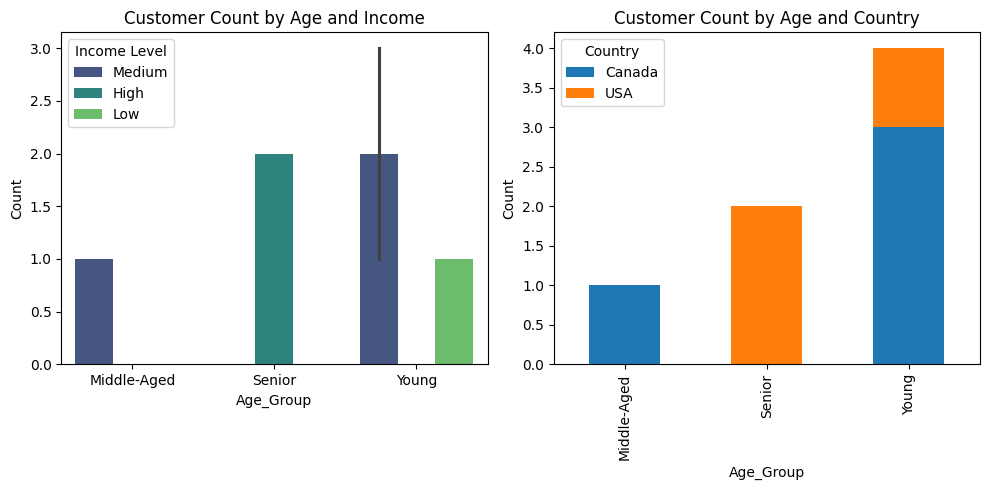

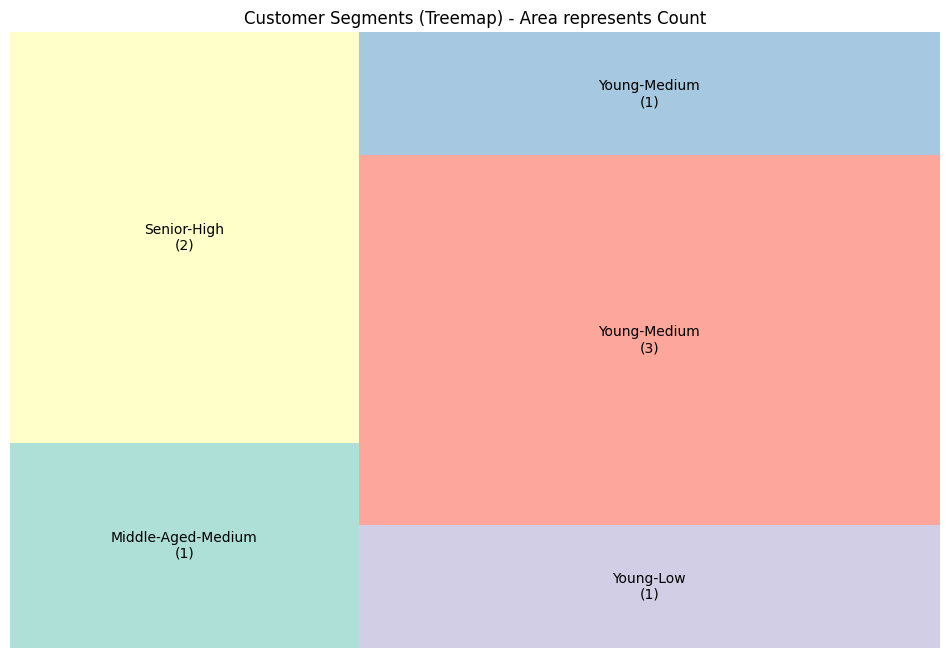

In [ ]:
# Visualization of the AOA Result
# 1. Bar Plot: Count by Age Group and Income Level
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=aoa_result, x='Age_Group', y='Count', hue='Income_Level', palette='viridis')
plt.title('Customer Count by Age and Income')
plt.legend(title='Income Level')

# 2. Stacked Bar Chart: Distribution across Countries
plt.subplot(1, 2, 2)
# Pivot the data for a stacked bar chart
pivot_df = aoa_result.pivot_table(index='Age_Group', columns='Country', values='Count', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, ax=plt.gca()) # plt.gca() gets the current axis
plt.title('Customer Count by Age and Country')
plt.ylabel('Count')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# 3. Treemap (Excellent for hierarchical data)
plt.figure(figsize=(12, 8))
# Create labels for the treemap: "AgeGroup-IncomeLevel (Count)"
labels = aoa_result.apply(lambda row: f"{row['Age_Group']}-{row['Income_Level']}\n({row['Count']})", axis=1)
sizes = aoa_result['Count']
colors = plt.cm.Set3(range(len(sizes)))

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Customer Segments (Treemap) - Area represents Count')
plt.show()
